In [288]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import math

pd.set_option('display.max_rows', 200) # Show up to 200 rows instead of the default
pd.set_option('display.max_columns', 100) # Show up to 200 columns instead of the default

In [328]:
# Load the dataset
# Pandas defaults to UTF-8, but this file includes special characters, so latin1 is used to avoid UnicodeDecodeError

df = pd.read_csv('Sample - Superstore.csv', encoding = 'latin1')

# Preview the data

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [331]:
# Display the number of rows and columns

df.shape

(9994, 21)

In [242]:
# Schema summary table

pd.DataFrame({
    'dtype': df.dtypes,
    'nulls': df.isnull().sum(),
    'count': df.count(),
    'unique': df.nunique()
    }).sort_index()

,dtype,nulls,count,unique
Category,object,0,9994,3
City,object,0,9994,531
Country,object,0,9994,1
Customer ID,object,0,9994,793
Customer Name,object,0,9994,793
Discount,float64,0,9994,12
Order Date,object,0,9994,1237
Order ID,object,0,9994,5009
Postal Code,int64,0,9994,631
Product ID,object,0,9994,1862


In [162]:
# Identify columns that could act as a primary key (no nulls and fully unique)

for col in df:
    
    if df[col].isnull().sum() == 0 and df[col].nunique() == len(df):
        
        print(f'Column {col} might be a primary key')

Column Row ID might be a primary key


In [332]:
# Identify columns with null (missing) values

columns_with_nulls = 0

for col in df:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        print(f'Column "{col}" has {null_count} null values')
        columns_with_nulls += 1

if columns_with_nulls == 0:
    print('No columns contain null values')

No columns contain null values


In [202]:
# Count how many rows are exact duplicates across all columns

df.duplicated().sum()

0

In [333]:
# Display all fully duplicated rows

df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [371]:
# Display basic statistics (count, mean, std, min, max, etc.) for numeric columns

round(df.describe(),3)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,days_to_ship
count,9994.000,9994.000,9994.000,9994.000,9994.000,9994.000,9994.000
mean,4997.500,55190.379,229.858,3.790,0.156,28.657,3.958
std,2885.164,32063.693,623.245,2.225,0.206,234.260,1.748
min,1.000,1040.000,0.444,1.000,0.000,-6599.978,0.000
25%,2499.250,23223.000,17.280,2.000,0.000,1.729,3.000
50%,4997.500,56430.500,54.490,3.000,0.200,8.666,4.000
75%,7495.750,90008.000,209.940,5.000,0.200,29.364,5.000
max,9994.000,99301.000,22638.480,14.000,0.800,8399.976,7.000


In [335]:
def not_within_range(df, col, min_range, max_range):
    
    """
    Count the number of values in a column that fall outside a specified range
    """
    
    count = df[col].count()
    count_outside_range = df[~df[col].between(min_range, max_range)][col].count()
    
    print(f'Count outside of range:')
           
    return count_outside_range

# Assuming the company policy is to never give over 75% discount

# Calling the function
not_within_range(df, col = 'Discount', min_range = 0, max_range = 0.75)

Count outside of range:


300

def group_by_col(df,col):
    # ensure col is always a list
    col = [col] if isinstance(col, str) else col

    count_dim = df.groupby(col).size()
    overall_count = len(df)
    
    percent_share = (
        count_dim / overall_count * 100
    ).round(1).sort_values(ascending=False)
    
    print(f'Percent share by {col}:')
    return percent_share.astype(str) + '%'

In [336]:
def group_by_col(df, col):
    
    """
    Calculate the percent share of each unique value in a column
    """
    
    percent_share = round(df[col].value_counts(normalize=True) * 100, 1).sort_values(ascending=False)
    
    print(f'Percent share by {col}:')
    
    return percent_share.astype(str) + '%'

# Calling the function
group_by_col(df, 'Category')

Percent share by Category:


Office Supplies    60.3%
Furniture          21.2%
Technology         18.5%
Name: Category, dtype: object

In [337]:
# For Florida only
group_by_col(df[df['State'] == 'Florida'], 'Category')

Percent share by Category:


Office Supplies    59.8%
Furniture          22.2%
Technology         18.0%
Name: Category, dtype: object

In [338]:
# Check extreme values in a numeric column by percentiles

def extreme_values_by_percentile(df, col, min_percentile, max_percentile, n = 10):
    
    """
    Returns the top 'n' highest and lowest values in a numeric column based on given percentiles
    """
    
    high = (
        df[df[col] >= np.percentile(df[col], max_percentile)]
        .sort_values(col, ascending = False)
        .head(n)
    )
    
    low = (
        df[df[col] <= np.percentile(df[col], min_percentile)]
        .sort_values(col, ascending = True)
        .head(n)
    )
    
    return pd.concat([high, low])

# Calling the function
extreme_values_by_percentile(df, 'Sales', 0.01, 0.99, n = 5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2014-145317,3/18/2014,3/23/2014,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6,0.5,-1811.0784
6826,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808
2623,2624,CA-2017-127180,10/22/2017,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,4191,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
4101,4102,US-2017-102288,6/19/2017,6/23/2017,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77095,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100


In [339]:
# Checking the min and max datetime of a column

def min_max_datetime(df,col):
    
    df[col] = pd.to_datetime(df[col])
    
    return df[col].min(), df[col].max()

# Calling the function
min_max_datetime(df,'Order Date')

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [340]:
min_max_datetime(df,'Ship Date')

(Timestamp('2014-01-07 00:00:00'), Timestamp('2018-01-05 00:00:00'))

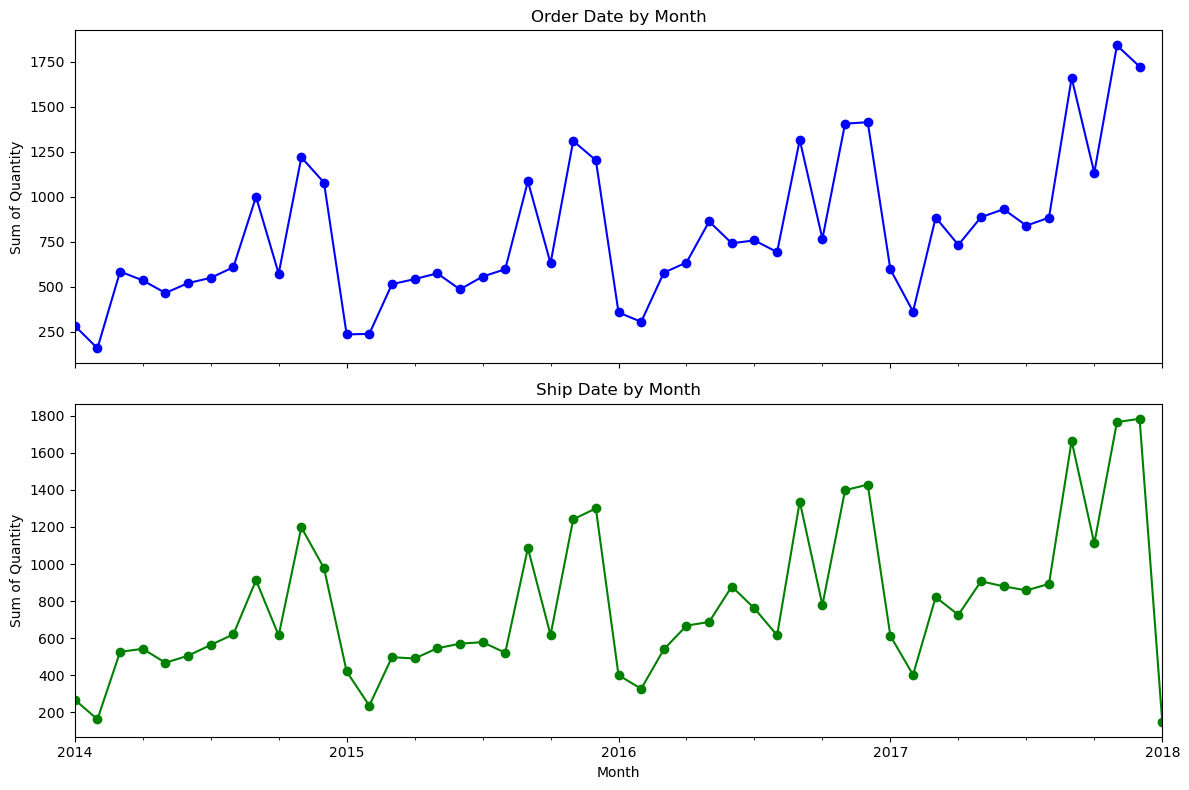

In [327]:
def plot_monthly_aggregation(df, date_cols = ['Order Date', 'Ship Date'], 
                             agg_col = 'Quantity', figsize = (12,8), colors = ['blue', 'green'], unit = 'M'):
    """
    Plots aggregation (sum) of a numeric column for one or more date columns by month, quarter, or year
    """
    
    # Map period codes to readable labels
    unit_dict = {'M': 'Month',
                 'Q': 'Quarter',
                 'Y': 'Year'}
    unit_label = unit_dict.get(unit, unit)  # default to unit itself if not in dict
    
    # Ensure all date columns are datetime
    for col in date_cols:
        df[col] = pd.to_datetime(df[col])
    
    # Create subplots
    fig, axes = plt.subplots(nrows = len(date_cols), ncols = 1, figsize = figsize, sharex = True)
    
    if len(date_cols) == 1:
        axes = [axes]  # Make iterable if only one plot
    
    for i, col in enumerate(date_cols):
        period_data = df.groupby(df[col].dt.to_period(unit))[agg_col].sum()
        period_data.plot(
            ax = axes[i], marker = 'o', color = colors[i % len(colors)], title = f'{col} by {unit_label}'
        )
        axes[i].set_ylabel(f'Sum of {agg_col}')
    
    axes[-1].set_xlabel(unit_label)
    plt.tight_layout()
    plt.show()

# Calling the function
plot_monthly_aggregation(df, date_cols = ['Order Date', 'Ship Date'], agg_col = 'Quantity', unit = 'M')

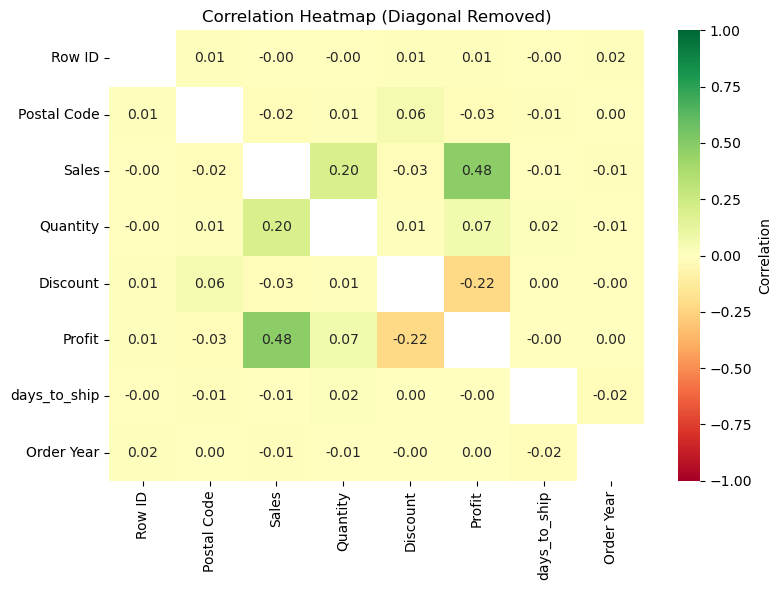

In [386]:
corr = df.select_dtypes('number').corr()

# Mask diagonal
corr_masked = corr.copy()
np.fill_diagonal(corr_masked.values, np.nan)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_masked, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap (Diagonal Removed)')
plt.tight_layout()
plt.show()

In [370]:
round(df.select_dtypes('number').corr(),3)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,days_to_ship
Row ID,1.000,0.010,-0.001,-0.004,0.013,0.012,-0.001
Postal Code,0.010,1.000,-0.024,0.013,0.058,-0.030,-0.010
Sales,-0.001,-0.024,1.000,0.201,-0.028,0.479,-0.007
Quantity,-0.004,0.013,0.201,1.000,0.009,0.066,0.018
Discount,0.013,0.058,-0.028,0.009,1.000,-0.219,0.000
Profit,0.012,-0.030,0.479,0.066,-0.219,1.000,-0.005
days_to_ship,-0.001,-0.010,-0.007,0.018,0.000,-0.005,1.000


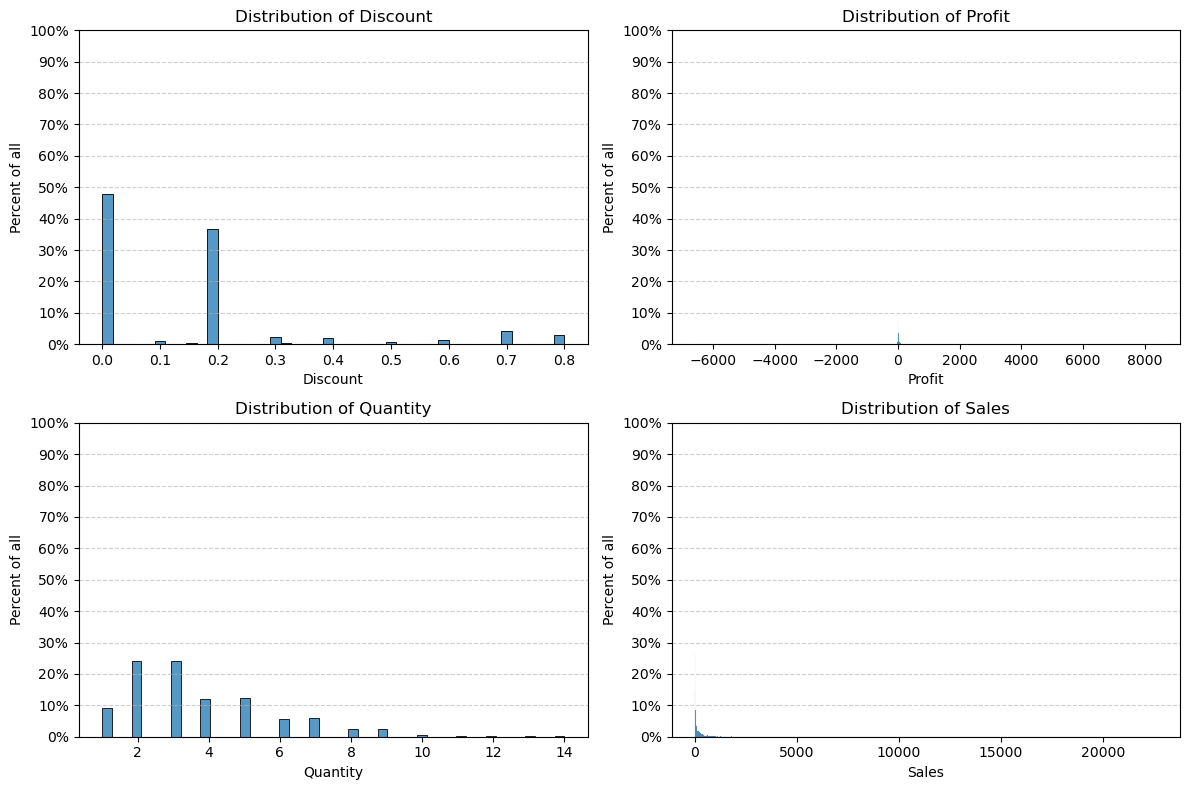

In [226]:
# Select numeric columns and exclude Row ID

num_cols = df.select_dtypes('number').columns.drop(['Row ID', 
                                                    'Postal Code'],
                                                   errors = 'ignore').sort_values() # Dropping irreleavent columns

n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize = (12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], stat = 'percent', ax = axes[i])
    
    axes[i].set_ylim(0, 100)
    axes[i].set_ylabel('Percent of all')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].grid(True, which = 'major', axis = 'y', linestyle = '--', alpha = 0.6)
    axes[i].yaxis.set_major_formatter(mtick.PercentFormatter())
    axes[i].set_yticks(np.arange(0, 101, 10))

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Can see that something looks strange with the Sales and Profit with some extremely high values

When I open a new dataset, I always check:

Shape & schema

Keys & duplicates

Nulls

Cardinality

Distributions & outliers

Time continuity

In [227]:
# Check datetime columns before creating columns that check the time between them

df.select_dtypes(include = ['datetime64[ns]']).columns

Index(['Order Date', 'Ship Date'], dtype='object')

In [341]:
# Create the 'days_to_ship' column if it doesn't already exist
df['days_to_ship'] = (df['Ship Date'] - df['Order Date']).dt.days

print(round(df['days_to_ship'].describe(),1))

# Good that Min is 0 as if not there would be a potential issue with the data

count    9994.0
mean        4.0
std         1.7
min         0.0
25%         3.0
50%         4.0
75%         5.0
max         7.0
Name: days_to_ship, dtype: float64


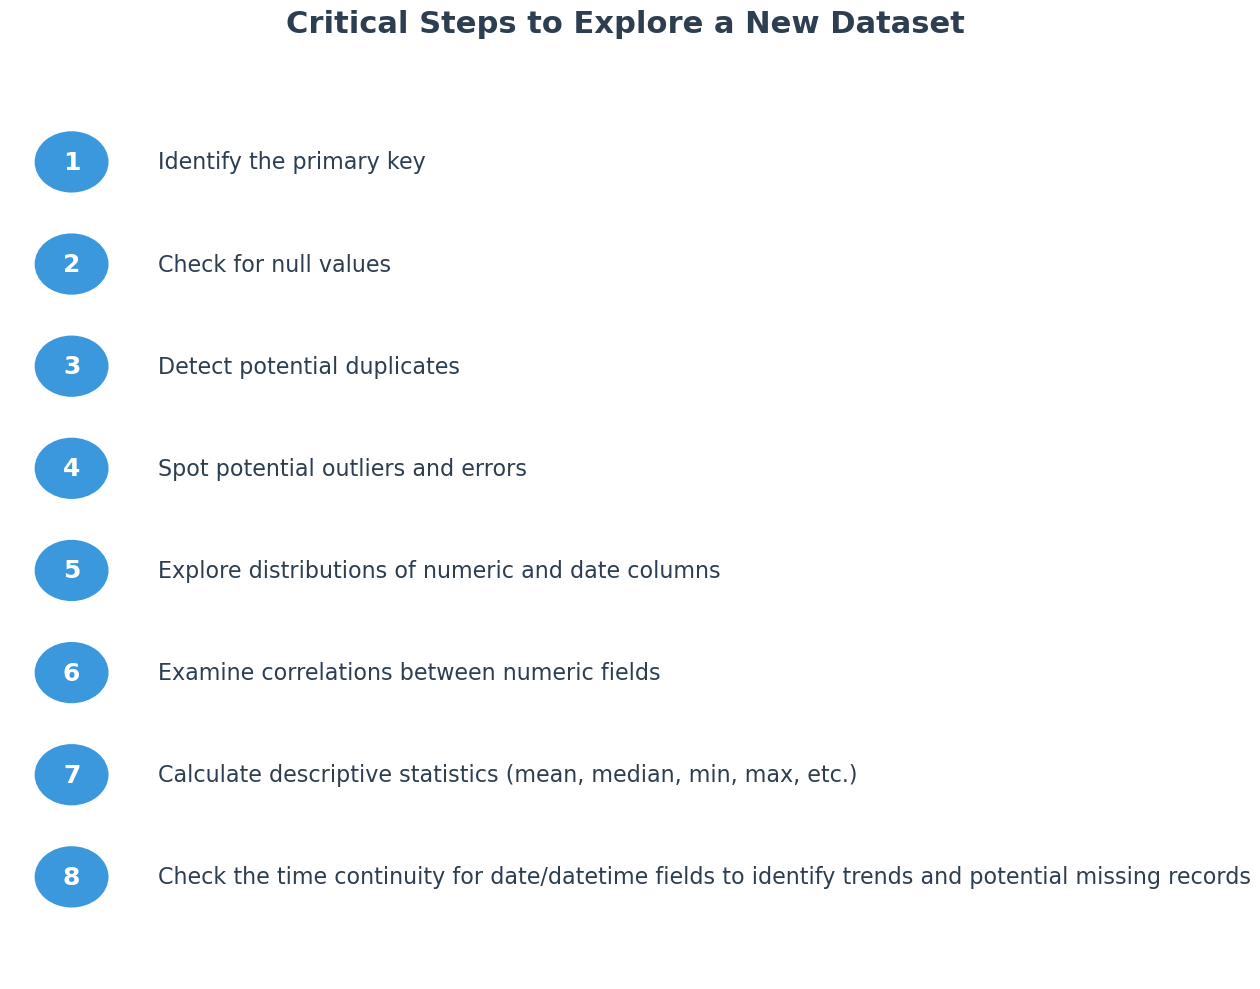

In [367]:
import matplotlib.pyplot as plt

steps = [
    "Identify the primary key",
    "Check for null values",
    "Detect potential duplicates",
    "Spot potential outliers and errors",
    "Explore distributions of numeric and date columns",
    "Examine correlations between numeric fields",
    "Calculate descriptive statistics (mean, median, min, max, etc.)",
    "Check the time continuity for date/datetime fields to identify trends and potential missing records"
]

fig, ax = plt.subplots(figsize=(14, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, len(steps) + 1)

for i, step in enumerate(steps, 1):
    y_pos = len(steps) - i + 1
    
    # Draw circle for number
    circle = plt.Circle((0.5, y_pos), 0.3, color='#3C98DD', ec='none')
    ax.add_patch(circle)
    
    # Add number inside circle
    ax.text(0.5, y_pos, str(i), va='center', ha='center', 
            fontsize=18, color='white', fontweight='bold')
    
    # Add step text
    ax.text(1.2, y_pos, step, va='center', ha='left', 
            fontsize=16, color='#2C3E50', wrap=True)

ax.axis('off')
plt.title("Critical Steps to Explore a New Dataset", 
          fontsize=22, fontweight='bold', color='#2C3E50', pad=20)
plt.tight_layout()
plt.show()

In [372]:
chunk_size = 5000  # rows per chunk

for chunk in df:
    # process each chunk separately
    print(chunk['Sales'].sum())

TypeError: string indices must be integers

In [377]:
import pandas as pd

def split_by_year(df, date_col):
    """
    Splits a DataFrame into a dictionary of DataFrames, one per year.
    
    Parameters:
        df (pd.DataFrame): the DataFrame to split
        date_col (str): the column containing datetime values
        
    Returns:
        dict: {year: DataFrame for that year}
    """
    # Ensure the column is datetime
    df[date_col] = pd.to_datetime(df[date_col])
    
    # Get the year for each row
    df['year'] = df[date_col].dt.year
    
    # Create a dictionary with {year: df_for_that_year}
    yearly_dfs = {year: year_df.drop(columns=['year']) for year, year_df in df.groupby('year')}
    
    return yearly_dfs

# Example usage:
# yearly_data = split_by_year(df, date_col='Order Date')
# Now yearly_data[2023], yearly_data[2024], etc. are separate DataFrames

# Optional: loop through each year to process
for year, year_df in df.items():
    print(f"\n--- Data for {year} ---")
    print(year_df.head())
    print(year_df.describe())



--- Data for Row ID ---
0    1
1    2
2    3
3    4
4    5
Name: Row ID, dtype: int64
count    9994.000000
mean     4997.500000
std      2885.163629
min         1.000000
25%      2499.250000
50%      4997.500000
75%      7495.750000
max      9994.000000
Name: Row ID, dtype: float64

--- Data for Order ID ---
0    CA-2016-152156
1    CA-2016-152156
2    CA-2016-138688
3    US-2015-108966
4    US-2015-108966
Name: Order ID, dtype: object
count               9994
unique              5009
top       CA-2017-100111
freq                  14
Name: Order ID, dtype: object

--- Data for Order Date ---
0   2016-11-08
1   2016-11-08
2   2016-06-12
3   2015-10-11
4   2015-10-11
Name: Order Date, dtype: datetime64[ns]
count                    9994
unique                   1237
top       2016-09-05 00:00:00
freq                       38
first     2014-01-03 00:00:00
last      2017-12-30 00:00:00
Name: Order Date, dtype: object

--- Data for Ship Date ---
0   2016-11-11
1   2016-11-11
2   2016-06-16


C:\Users\galgo\AppData\Local\Temp\ipykernel_11088\791061206.py:33: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(year_df.describe())
C:\Users\galgo\AppData\Local\Temp\ipykernel_11088\791061206.py:33: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(year_df.describe())


In [380]:
yearly_dfs

NameError: name 'yearly_dfs' is not defined

In [382]:
df_2017 = df[df['Order Date'].between('2017-01-01','2017-12-31')].copy()

df_2017.shape

(3312, 23)

In [383]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Order Date'].dtypes

dtype('<M8[ns]')